<a href="https://colab.research.google.com/github/syedmuhammadmuneeb/Big-Data/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BIG DATA PROJECT**

**INSTALLATION OF LIBRARIES**

In [229]:
!pip install yfinance
!pip install pandas
!pip install pyspark
!pip install kafka-python
!pip install confluent_kafka


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 35.4 MB/s eta 0:00:00


**Web Crawling of Data from YFinance**

In [174]:
import yfinance as yf
import pandas as pd

start_date = "2023-01-01"
end_date = "2024-01-01"
tickers = ['ARVL', 'AYRO', 'BLBD', 'CENN', 'CJET', 'ECDA', 'EGOX', 'EVTV', 'F', 'FFIE',
           'FSR', 'GM', 'GOEV', 'GP', 'HMC', 'HYZN', 'LCID', 'LI', 'LVWR', 'MULN',
           'NIO', 'NIU', 'PEV', 'PSNY', 'RACE', 'RIVN', 'SOLO', 'STLA', 'TM', 'TSLA',
           'VEV', 'VFS', 'VLCN', 'WKHS', 'XPEV', 'ZAPP']

# Fetch stock data for each ticker
all_data = {}
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    all_data[ticker] = stock_data

# Concatenate all data into a single DataFrame and reset index
df = pd.concat(all_data.values(), keys=all_data.keys(), names=['Ticker', 'Date']).reset_index()

# Display data
print(df.head())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

  Ticker       Date   Open    High     Low   Close  Adj Close  Volume
0   ARVL 2023-01-03   9.00   9.900   8.375   8.955      8.955  185045
1   ARVL 2023-01-04   9.75  11.600   9.000  11.600     11.600  178766
2   ARVL 2023-01-05  11.85  12.000  10.275  10.695     10.695  145309
3   ARVL 2023-01-06  10.40  10.785   9.750  10.000     10.000  104929
4   ARVL 2023-01-09  10.65  11.000  10.260  10.605     10.605   80311


**Exploratory Data Analysis Using Pandas**

In [187]:
# EDA
print(df.describe())
print(df.info())

              Open          High          Low        Close    Adj Close  \
count  8645.000000   8645.000000  8645.000000  8645.000000  8645.000000   
mean     86.938980     90.637999    82.686915    85.856779    85.811476   
std     560.019429    594.547120   525.256548   553.471481   553.469869   
min       0.212000      0.220000     0.194000     0.205000     0.205000   
25%       2.130000      2.210000     2.040000     2.120000     2.120000   
50%       9.080000      9.370000     8.770000     9.050000     9.050000   
75%      24.520000     25.299999    23.900000    24.740000    24.740000   
max    9675.000000  10800.000000  9225.000000  9450.000000  9450.000000   

             Volume  
count  8.645000e+03  
mean   1.216357e+07  
std    2.869468e+07  
min    0.000000e+00  
25%    5.960400e+04  
50%    5.842000e+05  
75%    9.203500e+06  
max    3.065906e+08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 8 columns):
 #   Column     Non-

In [176]:
#Count each column
print(f'Open: {df.Open.count()}' )
print(f'High: {df.High.count()}' )
print(f'Low: {df.Low.count()}' )
print(f'Close: {df.Close.count()}' )
print(f'Adj Close: {df["Adj Close"].count()}')
print(f'Volume: {df.Volume.count()}' )

Open: 8645
High: 8645
Low: 8645
Close: 8645
Adj Close: 8645
Volume: 8645


In [177]:
#checking duplicate values
print(f'Open: {df.Open.nunique()}' )
print(f'High: {df.High.nunique()}' )
print(f'Low: {df.Low.nunique()}' )
print(f'Close: {df.Close.nunique()}' )
print(f'Adj Close: {df["Adj Close"].nunique()}')
print(f'Volume: {df.Volume.nunique()}' )

Open: 4024
High: 4356
Low: 4247
Close: 4192
Adj Close: 4406
Volume: 7304


In [178]:
#Check data type
print(f'Open: {df.Open.dtype}' )
print(f'High: {df.High.dtype}' )
print(f'Low: {df.Low.dtype}' )
print(f'Close: {df.Close.dtype}' )
print(f'Adj Close: {df["Adj Close"].dtype}')
print(f'Volume: {df.Volume.dtype}' )

Open: float64
High: float64
Low: float64
Close: float64
Adj Close: float64
Volume: int64


In [179]:
#Check Numeric data type
print(f'Open: {pd.api.types.is_numeric_dtype(df.Open)}' )
print(f'High: {pd.api.types.is_numeric_dtype(df.High)}' )
print(f'Low: {pd.api.types.is_numeric_dtype(df.Low)}' )
print(f'Close: {pd.api.types.is_numeric_dtype(df.Close)}' )
print(f'Adj Close: {pd.api.types.is_numeric_dtype(df["Adj Close"])}')
print(f'Volume: {pd.api.types.is_numeric_dtype(df.Volume)}' )

Open: True
High: True
Low: True
Close: True
Adj Close: True
Volume: True


In [180]:
#check for missing values
df.isnull().sum()
print(f'Open: {df.Open.isnull().sum()}' )
print(f'High: {df.High.isnull().sum()}' )
print(f'Low: {df.Low.isnull().sum()}' )
print(f'Close: {df.Close.isnull().sum()}' )
print(f'Adj Close: {df["Adj Close"].isnull().sum()}')
print(f'Volume: {df.Volume.isnull().sum()}' )

Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0


In [181]:
df.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [182]:
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql import DataFrame, SparkSession
from pyspark.sql.functions import lit
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql import Row
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col
from pyspark.sql.types import (
    DateType,
    StructField,
    StructType,
    StringType,
)

# # Create SparkSession
# spark = (
#     SparkSession.builder.master("local[*]")
#     .appName("big data")
#     .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.3.1")
#     .config("spark.jars", "/usr/local/lib/python3.10/site-packages/pyspark/jars/postgresql-42.3.1.jar")
#     .getOrCreate()
# )

df_spark = spark.createDataFrame(df.reset_index())

spark = SparkSession.builder.appName("StockDataRDD").getOrCreate()
stock_data = stock_data.rename(columns={"Adj Close": "Adj_Close"})
stock_data_df = spark.createDataFrame(stock_data)

# Convert Python DataFrame to PySpark RDD
stock_data_rdd = stock_data_df.rdd

In [156]:
df_spark.show(5)

+-----+------+-------------------+------------------+------------------+------------------+------------------+------------------+------+
|index|Ticker|               Date|              Open|              High|               Low|             Close|         Adj Close|Volume|
+-----+------+-------------------+------------------+------------------+------------------+------------------+------------------+------+
|    0|  ARVL|2023-01-03 00:00:00|               9.0| 9.899999618530273|             8.375| 8.954999923706055| 8.954999923706055|185045|
|    1|  ARVL|2023-01-04 00:00:00|              9.75|11.600000381469727|               9.0|11.600000381469727|11.600000381469727|178766|
|    2|  ARVL|2023-01-05 00:00:00|11.850000381469727|              12.0|10.274999618530273|10.694999694824219|10.694999694824219|145309|
|    3|  ARVL|2023-01-06 00:00:00|10.399999618530273| 10.78499984741211|              9.75|              10.0|              10.0|104929|
|    4|  ARVL|2023-01-09 00:00:00|10.6499

**Initialization of Spark**

In [183]:
# # Filter stocks with price > 100 for all tickers
# filtered_df_spark = df_spark.filter((df_spark['Ticker'].isin(tickers)) & (df_spark['Close'] > 100))

# print(filtered_df_spark.collect())

from pyspark.sql.functions import col

# Convert the list of tickers to a DataFrame
tickers_df = spark.createDataFrame([(ticker,) for ticker in tickers], ['Ticker'])

# Filter stocks with price > 100 for all tickers
filtered_df_spark = df_spark.join(tickers_df, on='Ticker')

filtered_df_spark.show()



+------+-----+-------------------+------------------+------------------+------------------+------------------+------------------+-------+
|Ticker|index|               Date|              Open|              High|               Low|             Close|         Adj Close| Volume|
+------+-----+-------------------+------------------+------------------+------------------+------------------+------------------+-------+
|  ARVL|    0|2023-01-03 00:00:00|               9.0| 9.899999618530273|             8.375| 8.954999923706055| 8.954999923706055| 185045|
|  ARVL|    1|2023-01-04 00:00:00|              9.75|11.600000381469727|               9.0|11.600000381469727|11.600000381469727| 178766|
|  ARVL|    2|2023-01-05 00:00:00|11.850000381469727|              12.0|10.274999618530273|10.694999694824219|10.694999694824219| 145309|
|  ARVL|    3|2023-01-06 00:00:00|10.399999618530273| 10.78499984741211|              9.75|              10.0|              10.0| 104929|
|  ARVL|    4|2023-01-09 00:00:00|

In [163]:
filtered_df_spark.columns

['Ticker',
 'index',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume']

In [164]:

pandas_df = filtered_df_spark.toPandas()

In [194]:
# import plotly.graph_objects as go #candlestick charts
# # tickers is a list of unique tickers
# tickers = pandas_df['Ticker'].unique()

# # Create an empty figure
# fig = go.Figure()

# # Iterate over tickers and add candlestick trace for each
# for ticker in tickers:
#     # Filter data for the current ticker
#     filtered_data = pandas_df[pandas_df['Ticker'] == ticker]

#     # Add candlestick trace for the current ticker
#     trace = go.Candlestick(
#         x=filtered_data['Date'],
#         open=filtered_data['Open'],
#         high=filtered_data['High'],
#         low=filtered_data['Low'],
#         close=filtered_data['Close'],
#         name=ticker  # Display the ticker as the legend name
#     )

#     # Add the trace to the figure
#     fig.add_trace(trace)

# # Customize layout
# fig.update_layout(
#     autosize=False,
#     width=1500,
#     height=600,
#     title="Candlestick Chart for All Tickles",
#     template='simple_white',
#     xaxis_rangeslider_visible=False,
# )
# fig.update_xaxes(title_text="Date", rangeslider=dict(visible=False))
# fig.update_yaxes(title_text="Price")
# Assuming df is your combined stock data
# tickers is a list of unique tickers
tickers = df['Ticker'].unique()

# Create an empty figure
fig = go.Figure()

# Iterate over tickers and add candlestick trace for each
for ticker in tickers:
    # Filter data for the current ticker
    filtered_data = df[df['Ticker'] == ticker]

    # Add candlestick trace for the current ticker
    trace = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close'],
        name=ticker  # Display the ticker as the legend name
    )

    # Add the trace to the figure
    fig.add_trace(trace)

# Customize layout
fig.update_layout(
    autosize=False,
    width=1500,
    height=600,
    title="Candlestick Chart for All Tickles",
    template='simple_white',
    xaxis_rangeslider_visible=False,
)
fig.update_xaxes(title_text="Date", rangeslider=dict(visible=False))
fig.update_yaxes(title_text="Price")






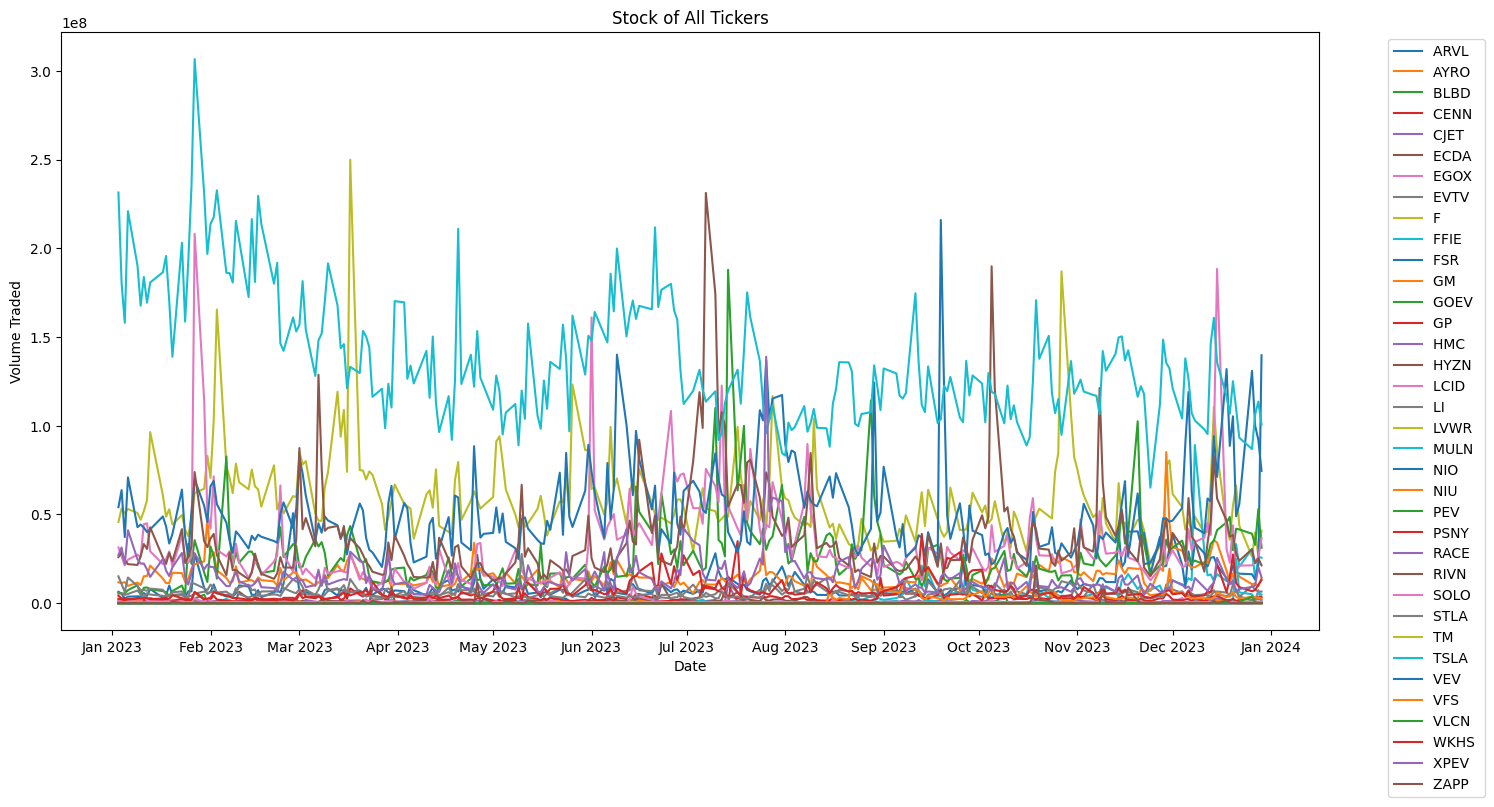

In [193]:
# Assuming 'Date' is in string format, convert it to datetime
df['Date'] = pd.to_datetime(df['Date'])

tickers = df['Ticker'].unique()

# Create a figure outside the loop
plt.figure(figsize=(15, 8))

# Iterate over tickers and update the figure
for ticker in tickers:
    # Filter data for the current ticker
    filtered_data = df[df['Ticker'] == ticker]

    # Plot volume for the current ticker
    plt.plot(filtered_data['Date'], filtered_data['Volume'], label=f'{ticker} ')

# Add legends and labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.title('Stock of All Tickers')
plt.xlabel('Date')
plt.ylabel('Volume Traded')

# Format x-axis ticks with month names and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adjust layout to prevent overlap of labels and title
plt.tight_layout()

# Show the plot
plt.show()


**Feature Engineering**

In [195]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Assuming your DataFrame has columns: ticker, date, open_, high, low, Close, adj, vol

# Calculate daily returns
result_df_spark = filtered_df_spark.withColumn(
    "prev_closing_price",
    F.lag("Close").over(Window.partitionBy("ticker").orderBy("date"))
).withColumn(
    "daily_return",
    (F.col("Close") / F.col("prev_closing_price")) - 1
).fillna(0)

# Calculate cumulative returns
result_df_spark = result_df_spark.withColumn(
    "cumulative_return",
    F.sum("daily_return").over(Window.partitionBy("ticker").orderBy("date").rowsBetween(Window.unboundedPreceding, 0))
)

# Show the resulting DataFrame
result_df_spark.show()


+------+-----+-------------------+------------------+------------------+------------------+------------------+------------------+-------+------------------+--------------------+-------------------+
|Ticker|index|               Date|              Open|              High|               Low|             Close|         Adj Close| Volume|prev_closing_price|        daily_return|  cumulative_return|
+------+-----+-------------------+------------------+------------------+------------------+------------------+------------------+-------+------------------+--------------------+-------------------+
|  ARVL|    0|2023-01-03 00:00:00|               9.0| 9.899999618530273|             8.375| 8.954999923706055| 8.954999923706055| 185045|               0.0|                 0.0|                0.0|
|  ARVL|    1|2023-01-04 00:00:00|              9.75|11.600000381469727|               9.0|11.600000381469727|11.600000381469727| 178766| 8.954999923706055|  0.2953657711109203| 0.2953657711109203|
|  ARVL|  

**Transfer RDD data to Pyspark DF**

In [196]:
pivot_df = (
    result_df_spark.groupBy("ticker")
    .pivot("date")
    .agg(F.first("daily_return").alias("dailyreturn"), F.first("cumulative_return").alias("cumulativereturn"))
    .orderBy("ticker")
)

pivot_df.show()


+------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+-------------------------------+------------------------------------+--------------------------

**K means clusters **


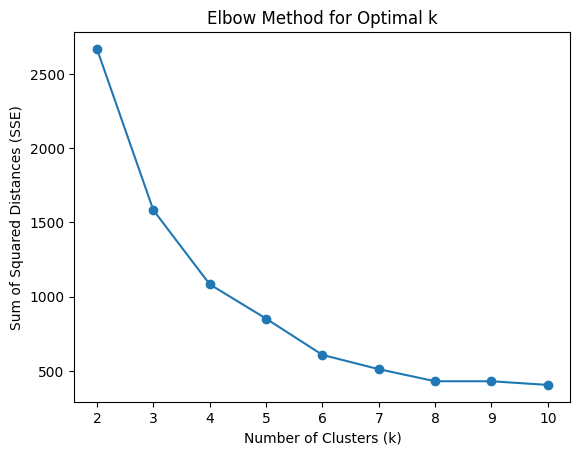

In [199]:
import matplotlib.pyplot as plt

# Replace it with the actual DataFrame name in your code

feature_columns=pivot_df.columns
feature_columns=feature_columns[1:]
# Assemble the feature columns into a vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features", handleInvalid="skip")
assembled_data = assembler.transform(pivot_df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaled_df = scaler.fit(assembled_data).transform(assembled_data)

# Run k-means clustering for a range of values of k
k_values = range(2, 11)  # Adjust the range as needed
sse = []  # Sum of squared distances

for k in k_values:
    kmeans = KMeans(k=k, seed=1)
    model = kmeans.fit(assembled_data)
    sse.append(model.summary.trainingCost)

# Plot the elbow curve
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


**Apply K-mean Cluster**

In [201]:
'''# Assemble the daily return columns into a vector column
feature_cols = pivot_df.columns[1:]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
feature_df = assembler.transform(pivot_df)

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaled_df = scaler.fit(feature_df).transform(feature_df)
'''
# Apply K-Means clustering
num_clusters = 8  # Adjust as needed
kmeans = KMeans(k=num_clusters, seed=42, featuresCol="scaled_features", predictionCol="cluster")
model = kmeans.fit(scaled_df)
result_df = model.transform(scaled_df)

# Display the results
result_df.select("Ticker", "cluster").show


**Covert to Pandas for Visualization**

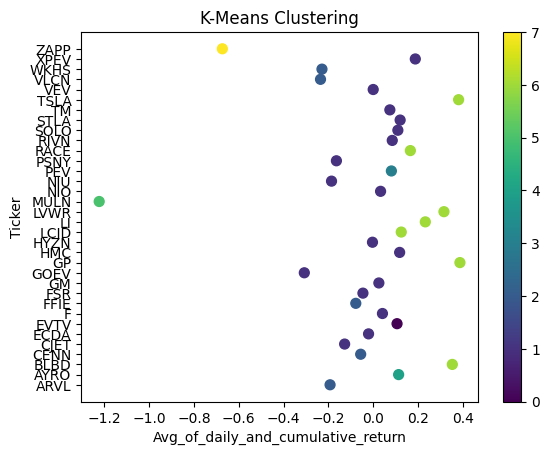

In [205]:
pandas_df = result_df.toPandas()
def calculate_average(lst):
    return sum(lst) / len(lst)

pandas_df['average_column'] = pandas_df['features'].apply(lambda x: calculate_average(x))

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(pandas_df['average_column'],pandas_df['ticker'],
                     c=pandas_df['cluster'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Avg_of_daily_and_cumulative_return')
ax.set_ylabel('Ticker')
plt.colorbar(scatter)

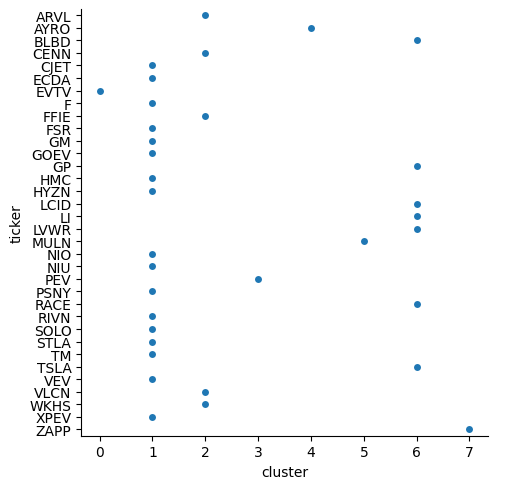

In [208]:
import seaborn as sns
sns.catplot(data=pandas_df, x="cluster", y="ticker")

**Kafka Setup**

In [209]:
!curl -sSOL https://archive.apache.org/dist/kafka/3.3.1/kafka_2.13-3.3.1.tgz
!tar -xzf kafka_2.13-3.3.1.tgz
!./kafka_2.13-3.3.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.3.1/config/zookeeper.properties
!./kafka_2.13-3.3.1/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.3.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


**Create Kafka Topics**

In [211]:
import os
for i in tickers:
  command = str('./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ') +  i
  print(command)
  os.system(command)
  os.system('sleep 2')

./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ARVL
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic AYRO
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic BLBD
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic CENN
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic CJET
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ECDA
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic EGOX
./kafka_2.13-3.3.1/bin/kafka-topics.sh --create --bootstrap-server 12

**Insert Stocks and Cluster Number to Kafka**

In [231]:
import numpy as np
from kafka import KafkaProducer

new_data = {}
for ticker in tickers:
  new_data[ticker] = (pandas_df.loc[(pandas_df['ticker'] == ticker)][['ticker','cluster']]).to_dict()


def error_callback(exc):
    raise Exception('Error while sendig data to kafka: {0}'.format(str(exc)))

def write_to_kafka(topic_name, items):
  count=0
  producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
  for key in items:
    producer.send(topic_name, key=key.encode('utf-8')).add_errback(error_callback)
    count+=1
  producer.flush()
  print("Wrote {0} messages into topic: {1}".format(count, topic_name))

for i in tickers:
  write_to_kafka(i, new_data[i])


Wrote 2 messages into topic: ARVL
Wrote 2 messages into topic: AYRO
Wrote 2 messages into topic: BLBD
Wrote 2 messages into topic: CENN
Wrote 2 messages into topic: CJET
Wrote 2 messages into topic: ECDA
Wrote 2 messages into topic: EGOX
Wrote 2 messages into topic: EVTV
Wrote 2 messages into topic: F
Wrote 2 messages into topic: FFIE
Wrote 2 messages into topic: FSR
Wrote 2 messages into topic: GM
Wrote 2 messages into topic: GOEV
Wrote 2 messages into topic: GP
Wrote 2 messages into topic: HMC
Wrote 2 messages into topic: HYZN
Wrote 2 messages into topic: LCID
Wrote 2 messages into topic: LI
Wrote 2 messages into topic: LVWR
Wrote 2 messages into topic: MULN
Wrote 2 messages into topic: NIO
Wrote 2 messages into topic: NIU
Wrote 2 messages into topic: PEV
Wrote 2 messages into topic: PSNY
Wrote 2 messages into topic: RACE
Wrote 2 messages into topic: RIVN
Wrote 2 messages into topic: SOLO
Wrote 2 messages into topic: STLA
Wrote 2 messages into topic: TM
Wrote 2 messages into topic: T